In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

    
file_path = r"C:\Users\Hp\Python\Data\hotel_bookings.csv"
df = pd.read_csv(file_path)
df.head()
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [3]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [15]:
df.describe(include = 'object')

# for col in df.describe(include = 'object').columns:
    # print(col)
    # print(df[col].unique())
    # print('-'*50)



df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [6]:
df.isnull().sum()
# df.drop(['agent' , 'company' , 'country'] , axis = 1 , inplace = True)
# df[df.groupby('arrival_date_month')]
df.groupby('arrival_date_month')[['is_canceled']].mean()


,is_canceled
arrival_date_month,
April,0.407972
August,0.377531
December,0.349705
February,0.334160
January,0.304773
July,0.374536
June,0.414572
March,0.321523
May,0.396658


<Axes: >

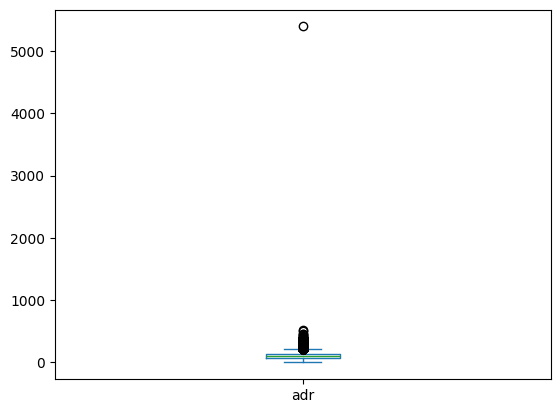

In [10]:
df['adr'].plot(kind = 'box')

In [11]:
# removing outlier

In [14]:
df = df[df['adr']<5000]
# it return summary statisatic of numerical dytpe , if want to include object then should give itnclude = 'object'
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.694107,189.266735,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774841,131.655015,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


                                                         DATA ANALYSIS AND VISUALIZATION

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


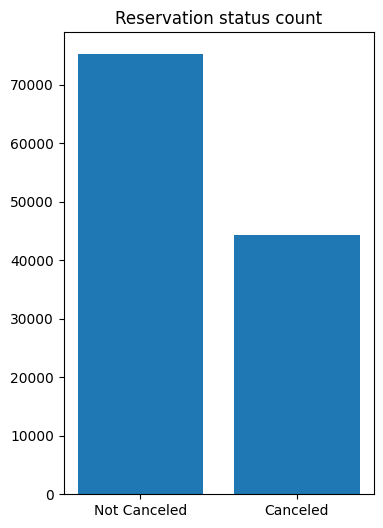

In [3]:
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)
print(cancelled_percentage)

plt.figure(figsize = (4,6))
plt.title("Reservation status count")
plt.bar(['Not Canceled' , 'Canceled'] , df['is_canceled'].value_counts())

plt.show()


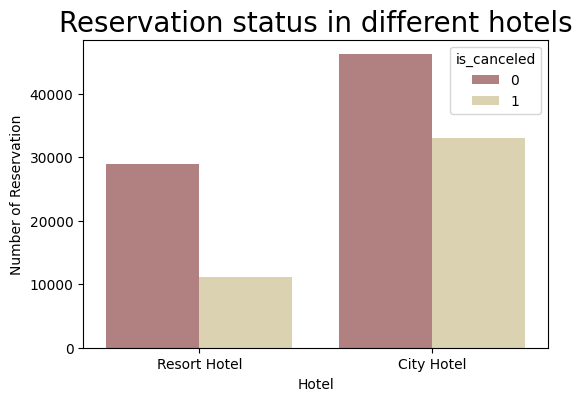

In [5]:
plt.figure(figsize = (6,4))
axl = sb.countplot(x = 'hotel', hue = 'is_canceled' , data = df , palette =  'pink')
legend_labels = axl. get_legend_handles_labels()
plt.title('Reservation status in different hotels' , size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservation')

plt.show()

In [23]:
# Finding percenatage of cancelation in both hotel 0=not canceled , 1 = canceled
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize =  True)

city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize =  True)
df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


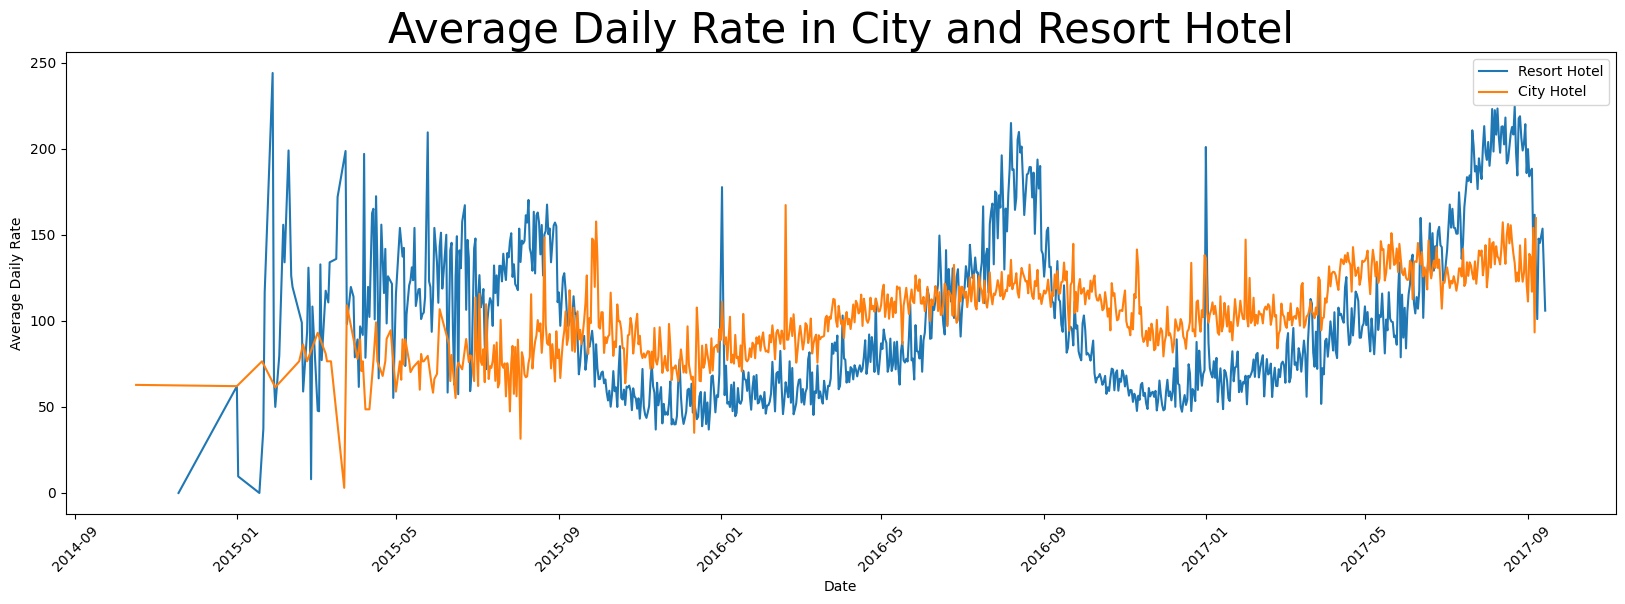

In [32]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

resort_hotel.index = pd.to_datetime(resort_hotel.index)
city_hotel.index = pd.to_datetime(city_hotel.index)
resort_hotel = resort_hotel.sort_index()
city_hotel = city_hotel.sort_index()

plt.figure(figsize=(20, 6))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


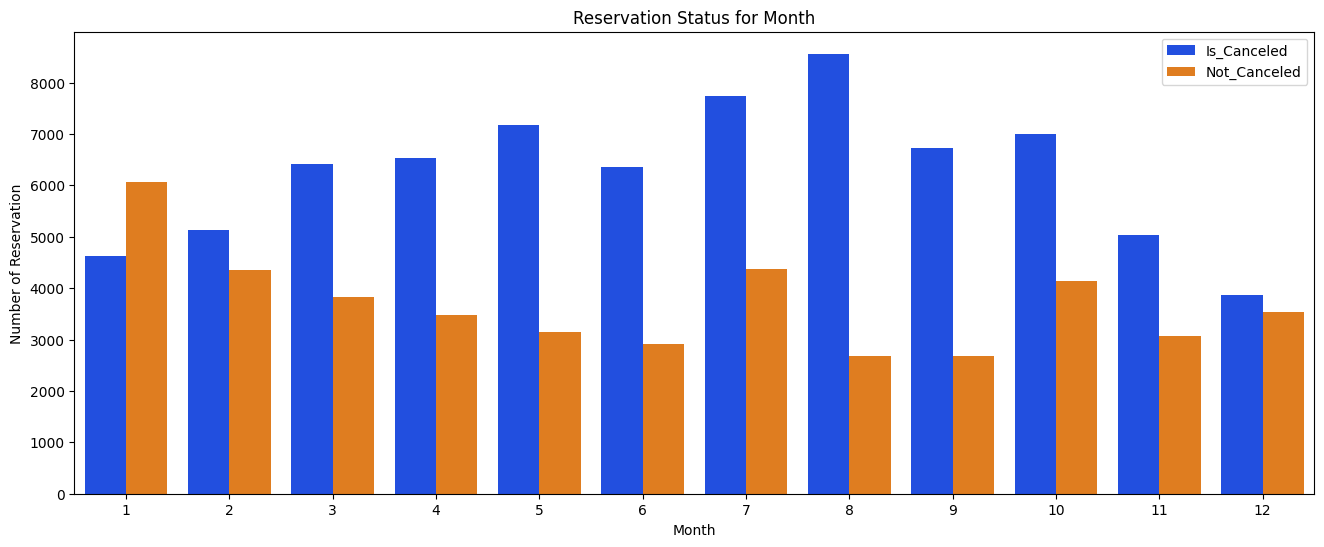

In [9]:
# Convert 'reservation_status_date'  to datetime dtype
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month information
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize = (16,6))
axl = sb.countplot(x = 'month' , hue = 'is_canceled' , data = df , palette = 'bright')
legend_labels = axl. get_legend_handles_labels()
axl.legend(loc = 'upper right' , bbox_to_anchor = (1,1))
plt.legend(['Is_Canceled' , 'Not_Canceled'])
plt.title('Reservation Status for Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.show()

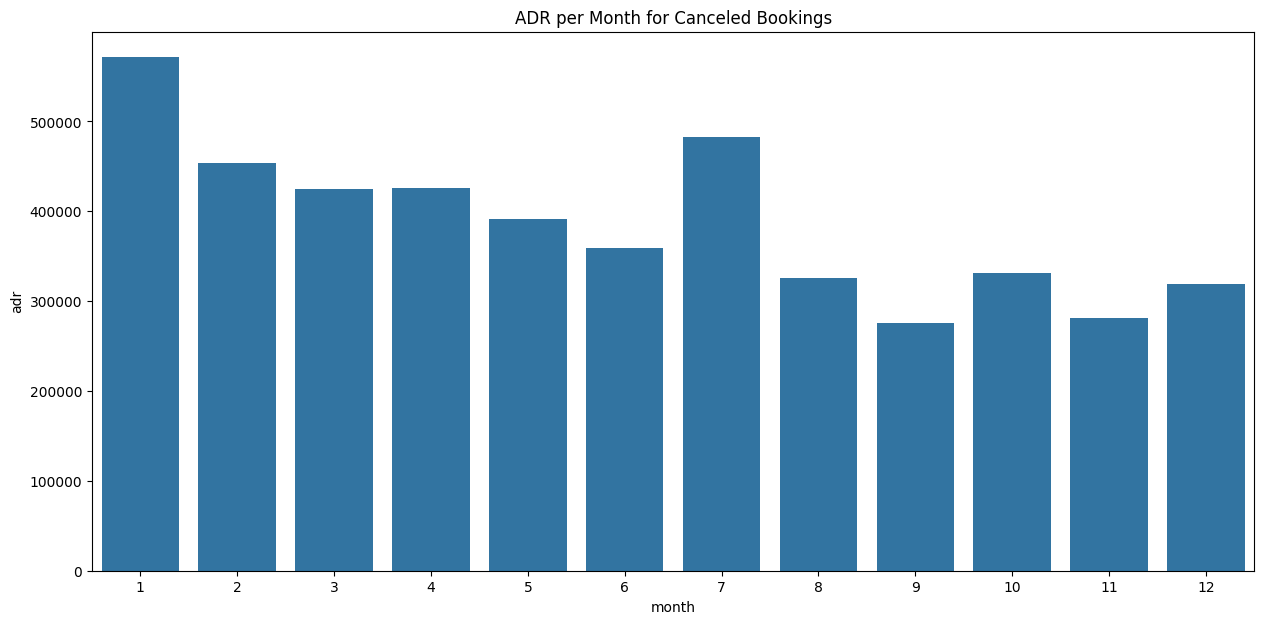

In [15]:
# Group by month, sum ADR, and reset index
canceled_monthly_adr = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 7))
plt.title("ADR per Month for Canceled Bookings")
sb.barplot(x='month', y='adr', data=canceled_monthly_adr)
plt.show()


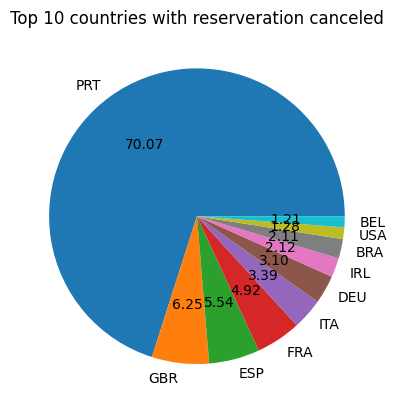

In [21]:
canceled_data = df[df['is_canceled'] == 1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.title("Top 10 countries with reserveration canceled")
plt.pie(top_10_country , autopct = '%.2f' , labels = top_10_country.index)
plt.show()

In [32]:
print(df['market_segment'].value_counts(normalize =  True))

canceled_data['market_segment'].value_counts(normalize =  True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64


market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

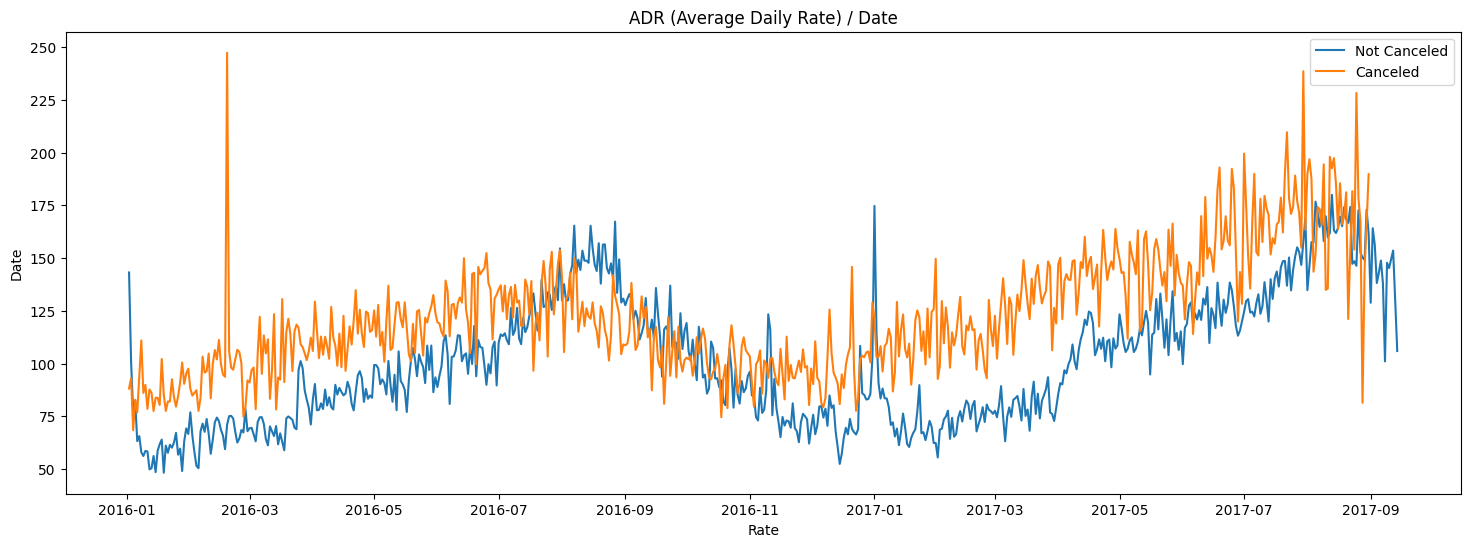

In [51]:

# Convert 'reservation_status_date' to datetime objects
canceled_data_adr['reservation_status_date'] = pd.to_datetime(canceled_data_adr['reservation_status_date'])
not_canceled_data_adr['reservation_status_date'] = pd.to_datetime(not_canceled_data_adr['reservation_status_date'])

# Filter data for the desired date range
canceled_data_adr = canceled_data_adr[(canceled_data_adr['reservation_status_date'] > '2016') & (canceled_data_adr['reservation_status_date'] < '2018')]
not_canceled_data_adr = not_canceled_data_adr[(not_canceled_data_adr['reservation_status_date'] > '2016-1-1') & (not_canceled_data_adr['reservation_status_date'] < '2018-1-1')]

# Sort the data by reservation_status_date
canceled_data_adr.sort_values('reservation_status_date', inplace=True)
not_canceled_data_adr.sort_values('reservation_status_date', inplace=True)

# Plot the data
plt.figure(figsize=(18, 6))
plt.title("ADR (Average Daily Rate) / Date")
plt.xlabel('Rate')
plt.ylabel('Date')

plt.plot(not_canceled_data_adr['reservation_status_date'], not_canceled_data_adr['adr'], label='Not Canceled')
plt.plot(canceled_data_adr['reservation_status_date'], canceled_data_adr['adr'], label='Canceled')
plt.legend() 
plt.show()
